In [7]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np

## Normal Distribution

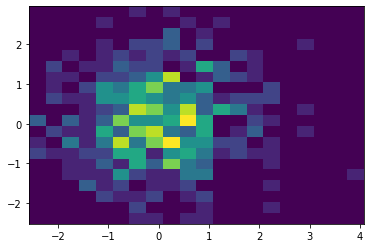

In [3]:
a = np.random.normal(loc=0.0, scale=1.0, size=500)
b = np.random.normal(loc=0.0, scale=1.0, size=500)
p_norm = plt.hist2d(a, b, bins=20)

## Logistic Normal Distribution

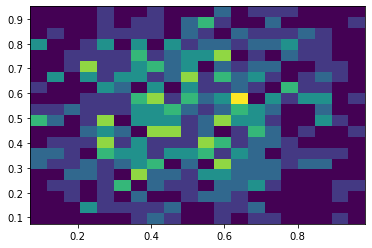

In [5]:
# Logistic transformation leads to normalized values (between -1 and 1)
logistic_a = np.exp(a)/(1+ np.exp(a)) 
logistic_b = np.exp(b)/(1+ np.exp(b)) 

p = plt.hist2d(logistic_a, logistic_b, bins=20)


## Dirichlet Distribution

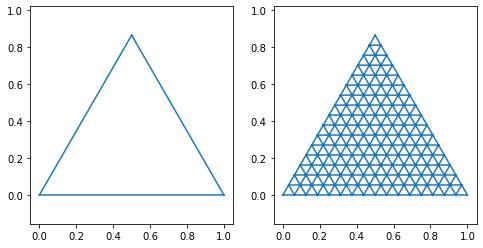

In [9]:

corners = np.array([[0, 0], [1, 0], [0.5, 0.75**0.5]])
AREA = 0.5 * 1 * 0.75**0.5
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

plt.figure(figsize=(8, 4))
for (i, mesh) in enumerate((triangle, trimesh)):
    plt.subplot(1, 2, i+ 1)
    plt.triplot(mesh)
    #plt.axis('off')
    plt.axis('equal')


In [10]:
from functools import reduce
import operator


# For each corner of the triangle, the pair of other corners
pairs = [corners[np.roll(range(3), -i)[1:]] for i in range(3)]
# The area of the triangle formed by point xy and another pair or points
tri_area = lambda xy, pair: 0.5 * np.linalg.norm(np.cross(*(pair - xy)))

def xy2bc(xy, tol=1.e-4):
    '''Converts 2D Cartesian coordinates to barycentric.'''
    coords = np.array([tri_area(xy, p) for p in pairs]) / AREA
    return np.clip(coords, tol, 1.0 - tol)

class Dirichlet(object):
    def __init__(self, alpha):
        from math import gamma
        from operator import mul
        self._alpha = np.array(alpha)
        self._coef = gamma(np.sum(self._alpha)) / \
                           np.multiply.reduce([gamma(a) for a in self._alpha])
    def pdf(self, x):
        '''Returns pdf value for `x`.'''
        from operator import mul
        return self._coef * np.multiply.reduce([xx ** (aa - 1)
                                               for (xx, aa)in zip(x, self._alpha)])

class Multinomial(object):
    def __init__(self, mu, sigma): 
        from operator import mul
        self._mu = np.array(mu)
        self._sigma = np.array(sigma)

    def pdf(self, x):
        '''Returns pdf value for `x`.'''
        from operator import mul
        return norm.pdf(logit(x), loc=self._mu, scale=self._sigma)
        
def draw_pdf_contours(dist, nlevels=200, subdiv=8, **kwargs):
    import math

    refiner = tri.UniformTriRefiner(triangle)
    trimesh = refiner.refine_triangulation(subdiv=subdiv)
    pvals = [dist.pdf(xy2bc(xy)) for xy in zip(trimesh.x, trimesh.y)]

    
    plt.tricontourf(trimesh, pvals, nlevels, cmap='jet', **kwargs)
    plt.axis('equal')
    plt.xlim(0, 1)
    plt.ylim(0, 0.75**0.5)
    plt.axis('off')

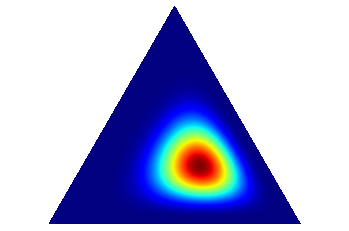

In [11]:
draw_pdf_contours(Dirichlet([5,8,5]))